<a href="https://colab.research.google.com/github/tudi72/SIEMENS/blob/main/ecg_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# READING DATA

In [ ]:
! gdown --id 1CPGUYLXx71MKya8UC6NZihrzKlQBUYGa

In [ ]:
# from google.colab import files
# # url = "https://drive.google.com/file/d/1OCCO8WwHdse-hu7rE3yTAn3XjzusyFhY/view?usp=sharing"
# uploaded = files.upload()

Saving data_7.csv to data_7.csv


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data_7.csv')

In [8]:
MLII_X = df['MLII'].values.reshape(-1,1)
MLII_y = df['Type'].values.reshape(-1,1)
MLII_X_train, MLII_X_test, MLII_y_train, MLII_y_test = train_test_split(MLII_X, MLII_y, test_size=0.33, random_state=42)

In [9]:
unique, counts = np.unique(MLII_y_train,return_counts=True)
print('Healthy instances: ',counts[0],'\tSick instances: ',counts[1])

unique, counts = np.unique(MLII_y_test,return_counts=True)
print('Healthy instances: ',counts[0],'\tSick instances: ',counts[1])

Healthy instances:  49687 	Sick instances:  21145
Healthy instances:  24415 	Sick instances:  10473


In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

In [ ]:
import autosklearn

In [ ]:
# 15 minutes to process patient 101
from autosklearn.classification import AutoSklearnClassifier

model = AutoSklearnClassifier(time_left_for_this_task=120*60,memory_limit= 15000)

model.fit(MLII_X_train,MLII_y_train)
# model.fit(MLII_X_train_217,MLII_y_train_217)


AutoSklearnClassifier(memory_limit=15000, per_run_time_limit=720,
                      time_left_for_this_task=7200)

In [ ]:
MLII_y_pred = model.predict(MLII_X_test)
# MLII_y_pred_217 = model.predict(MLII_X_test_217)

0.8709872977447894


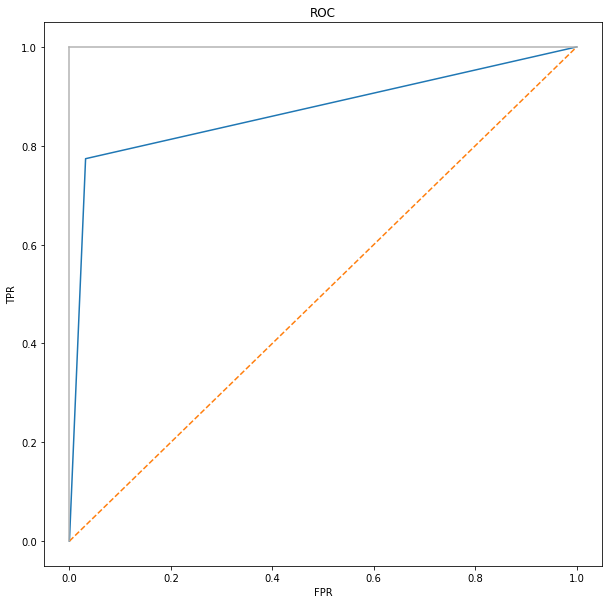

In [ ]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt 

# fpr, tpr, thresholds = roc_curve(MLII_y_test_217, MLII_y_pred_217)
fpr, tpr, thresholds = roc_curve(MLII_y_test, MLII_y_pred)
print(auc(fpr, tpr))

plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix


print("Accuracy\t", accuracy_score(MLII_y_test, MLII_y_pred))
tn,fp,fn,tp = confusion_matrix(MLII_y_test,MLII_y_pred).ravel()
TPR = tp / (tp+fp)
FPR = fp / (fn + tn)

print('TP ', tp)
print('TN ', tn)
print('FP ', fp)
print('FN ', fn)
print('TPR\t\t',TPR)
print('FPR\t\t',FPR)


Accuracy	 0.9098257280440266
TP  8104
TN  23638
FP  777
FN  2369
TPR		 0.9125098524940886
FPR		 0.029876571692236707


In [ ]:
print(model.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
100          1             0.04  k_nearest_neighbors  0.092235  2.131716
104          2             0.02  k_nearest_neighbors  0.092321  2.396288
124          3             0.02  k_nearest_neighbors  0.092321  2.663598
150          4             0.04  k_nearest_neighbors  0.092364  1.709710
151          5             0.04  k_nearest_neighbors  0.092364  6.249227
127          6             0.02  k_nearest_neighbors  0.092406  2.105303
103          7             0.02  k_nearest_neighbors  0.092406  2.199262
87           8             0.08  k_nearest_neighbors  0.092449  2.028802
138          9             0.04  k_nearest_neighbors  0.092449  1.829965
129         10             0.02  k_nearest_neighbors  0.092449  1.964683
95          11             0.02  k_nearest_neighbors  0.092492  2.086298
140         12             0.02  k_nearest_neighbor

In [ ]:
print(model.sprint_statistics())
model.show_models()

auto-sklearn results:
  Dataset name: d2cdc89e-34f0-11ed-8304-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.907765
  Number of target algorithm runs: 154
  Number of successful target algorithm runs: 123
  Number of crashed target algorithm runs: 26
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 3



{100: {'model_id': 100,
  'rank': 1,
  'cost': 0.09223529411764708,
  'ensemble_weight': 0.04,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f5c91cc01d0>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f5c91c94d90>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f5c91c94350>,
  'sklearn_classifier': KNeighborsClassifier(n_neighbors=80, weights='distance')},
 104: {'model_id': 104,
  'rank': 2,
  'cost': 0.09232085561497327,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f5c8e864590>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f5c8e6cbed0>,
  'classifier': <autosklearn.pipeline.components.cla

In [ ]:
import sklearn.metrics
predictions = model.predict(MLII_X_train)
print("Accuracy score:", sklearn.metrics.accuracy_score(MLII_y_train, predictions))

Accuracy score: 0.9369635193133047
